# **StarDist (2D)**
---

<font size = 4>**StarDist 2D** is a deep-learning method that can be used to segment cell nuclei from bioimages and was first published by [Schmidt *et al.* in 2018, on arXiv](https://arxiv.org/abs/1806.03535). It uses a shape representation based on star-convex polygons for nuclei in an image to predict the presence and the shape of these nuclei. This StarDist 2D network is based on an adapted U-Net network architecture.

<font size = 4> **This particular notebook enables nuclei segmentation of 2D dataset. If you are interested in 3D dataset, you should use the StarDist 3D notebook instead.**

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories. The BioImage Model Zoo export was jointly developed by [Estibaliz Gómez de Mariscal](https://github.com/esgomezm) (deepImageJ team).


<font size = 4>This notebook is largely based on the paper:

<font size = 4>**Cell Detection with Star-convex Polygons** from Schmidt *et al.*, International Conference on Medical Image Computing and Computer-Assisted Intervention (MICCAI), Granada, Spain, September 2018. (https://arxiv.org/abs/1806.03535)

<font size = 4>and the 3D extension of the approach:

<font size = 4>**Star-convex Polyhedra for 3D Object Detection and Segmentation in Microscopy** from Weigert *et al.* published on arXiv in 2019 (https://arxiv.org/abs/1908.03636)

<font size = 4>**The Original code** is freely available in GitHub:
https://github.com/mpicbg-csbd/stardist

<font size = 4>The guidelines to use the trained network in ImageJ with deepImageJ are given in the following paper:

<font size = 4>**DeepImageJ: a user-friendly environment to run deep learning models in ImageJ**, bioRxiv (2019) by *Estibaliz Gómez-de-Mariscal, Carlos García-López-de-Haro, Wei Ouyang, Laurène Donati, Emma Lundberg, Michael Unser, Arrate Muñoz-Barrutia and Daniel Sage* (https://doi.org/10.1101/799270)
     
<font size = 4>**Please also cite this original paper when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4> For StarDist to train, **it needs to have access to a paired training dataset made of images of nuclei and their corresponding masks**. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model**. The quality control assessment can be done directly in this notebook.

<font size = 4>The data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Images" (Training_source) and "Training - Masks" (Training_target).

<font size = 4>Additionally, the corresponding Training_source and Training_target files need to have **the same name**.

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed. This can include Test dataset for which you have the equivalent output and can compare to what the network provides.

<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Images of nuclei (Training_source)
        - img_1.tif, img_2.tif, ...
      - Masks (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Images of nuclei
        - img_1.tif, img_2.tif
      - Masks 
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install StarDist and dependencies**
---


## **1.1. Install key dependencies**
---
<font size = 4> 

In [1]:
#@markdown ##Install StarDist and dependencies

# Install packages which are not included in Google Colab
!pip install tifffile # contains tools to operate tiff-files
!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.
!pip install 'stardist[bioimageio]'
!pip install gputools # improves STARDIST performances
#!pip install edt # improves STARDIST performances
!pip install wget
!pip install fpdf
!pip install PTable # Nice tables 
!pip install zarr
!pip install imagecodecs
#Force session restart
exit(0)

     |████████████████████████████████| 73 kB 1.8 MB/s 
     |████████████████████████████████| 2.9 MB 8.8 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
     |████████████████████████████████| 3.0 MB 4.3 MB/s 
     |████████████████████████████████| 70 kB 9.0 MB/s 
     |████████████████████████████████| 3.3 MB 38.8 MB/s 
     |████████████████████████████████| 109 kB 90.2 MB/s 
     |████████████████████████████████| 130 kB 78.9 MB/s 
     |████████████████████████████████| 47 kB 5.7 MB/s 
     |████████████████████████████████| 4.3 MB 31.7 MB/s 
     |████████████████████████████████| 546 kB 69.4 MB/s 
  Attempting uni

     |████████████████████████████████| 152 kB 4.3 MB/s 
     |████████████████████████████████| 191 kB 47.7 MB/s 
     |████████████████████████████████| 882 kB 49.6 MB/s 
     |████████████████████████████████| 67 kB 7.1 MB/s 
     |████████████████████████████████| 78 kB 8.9 MB/s 
  Created wheel for pytools: filename=pytools-2022.1.2-py2.py3-none-any.whl size=63903 sha256=52b50943bc730b64cfd7756fd7483f551d01314ece04c7330787b63fc3e0610c
  Stored in directory: /root/.cache/pip/wheels/71/24/3d/aa7df2a581a0cc0c86ca368104c8e3613848c78df40a88e9f9
  Created wheel for reikna: filename=reikna-0.7.6-py3-none-any.whl size=122375 sha256=6d228260d02b25288aef6d32a80fcf9ec87737dc2f41fb58a7631eac482caa88
  Stored in directory: /root/.cache/pip/wheels/fd/c4/91/27633985abbbb1b611bdd8453593cd0104f816e9b57b1c0d7f
Successfully built pytools reikna
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=fa16aadbc4ccdb44cc214991c0d92703a5c9eb53cbd91a06a562d08663971f8e
  Stored in di


## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>






## **1.3. Load key dependencies**
---
<font size = 4> 

In [10]:
#@markdown ##Load key dependencies

Notebook_version = '1.14'
Network = 'StarDist 2D BioimageIO'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path, delimiter = "\n")
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]


#%load_ext memory_profiler


%tensorflow_version 1.x

import tensorflow
print(tensorflow.__version__)
print("Tensorflow enabled.")


import imagecodecs

# ------- Variable specific to Stardist -------
from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available, relabel_image_stardist, random_label_cmap,  relabel_image_stardist, _draw_polygons, export_imagej_rois
from stardist.models import Config2D, StarDist2D, StarDistData2D # import objects
from stardist.matching import matching_dataset
from __future__ import print_function, unicode_literals, absolute_import, division
from csbdeep.utils import Path, normalize, download_and_extract_zip_file, plot_history # for loss plot
from csbdeep.io import save_tiff_imagej_compatible
import numpy as np
np.random.seed(42)
lbl_cmap = random_label_cmap()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from PIL import Image
import zarr
from zipfile import ZIP_DEFLATED
from csbdeep.data import Normalizer, normalize_mi_ma
import imagecodecs


class MyNormalizer(Normalizer):
    def __init__(self, mi, ma):
            self.mi, self.ma = mi, ma
    def before(self, x, axes):
        return normalize_mi_ma(x, self.mi, self.ma, dtype=np.float32)
    def after(*args, **kwargs):
        assert False
    @property
    def do_after(self):
        return False



# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil 
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32, img_as_ubyte, img_as_float
from skimage.util import img_as_ubyte
from tqdm import tqdm 
import cv2
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess

# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets

import urllib
from keras.layers import Concatenate
from keras.models import Model

# BioImage Model Zoo export
from stardist import export_bioimageio, import_bioimageio
from pathlib import Path
import bioimageio.core
from bioimageio.core import load_resource_description

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print('------------------------------------------')
print("Libraries installed")


# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")



# PDF export

def pdf_export(trained=False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
    
  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras','csbdeep']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+conf.train_dist_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  #text = 'The '+Network+' model ('+model_name+') was trained using '+str(dataset_size)+' paired images (image dimensions: '+str(shape)+') using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The GPU used was a '+gpu_name+'.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+conf.train_dist_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by a factor of '+str(Multiply_dataset_by)
    
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{4}</td>
    </tr>
      <tr>
      <td width = 50%>n_rays</td>
      <td width = 50%>{5}</td>
    </tr>
      <tr>
      <td width = 50%>grid_parameter</td>
      <td width = 50%>{6}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{7}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_size)+'x'+str(patch_size),batch_size,number_of_steps,percentage_validation,n_rays,grid_parameter,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_StarDist2D.png').shape
  pdf.image('/content/TrainingDataExample_StarDist2D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- StarDist 2D: Schmidt, Uwe, et al. "Cell detection with star-convex polygons." International Conference on Medical Image Computing and Computer-Assisted Intervention. Springer, Cham, 2018.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  if augmentation:
    ref_4 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
    pdf.multi_cell(190, 5, txt = ref_4, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")


def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
      pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'Stardist 2D'

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/lossCurvePlots.png').shape
  if os.path.exists(full_QC_model_path+'/Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'/Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Courier New" >
  <table width=100% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/Quality Control/Quality_Control for '+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    #image = header[0]
    #PvGT_IoU = header[1]
    fp = header[2]
    tp = header[3]
    fn = header[4]
    precision = header[5]
    recall = header[6]
    acc = header[7]
    f1 = header[8]
    n_true = header[9]
    n_pred = header[10]
    mean_true = header[11]
    mean_matched = header[12]
    panoptic = header[13]
    header = """
    <tr>
    <th width = 5% align="center">{0}</th>
    <th width = 12% align="center">{1}</th>
    <th width = 6% align="center">{2}</th>
    <th width = 6% align="center">{3}</th>
    <th width = 6% align="center">{4}</th>
    <th width = 5% align="center">{5}</th>
    <th width = 5% align="center">{6}</th>
    <th width = 5% align="center">{7}</th>
    <th width = 5% align="center">{8}</th>
    <th width = 5% align="center">{9}</th>
    <th width = 5% align="center">{10}</th>
    <th width = 10% align="center">{11}</th>
    <th width = 11% align="center">{12}</th>
    <th width = 11% align="center">{13}</th>
    </tr>""".format("image #","Prediction v. GT IoU",'false pos.','true pos.','false neg.',precision,recall,acc,f1,n_true,n_pred,mean_true,mean_matched,panoptic)
    html = html+header
    i=0
    for row in metrics:
      i+=1
      #image = row[0]
      PvGT_IoU = row[1]
      fp = row[2]
      tp = row[3]
      fn = row[4]
      precision = row[5]
      recall = row[6]
      acc = row[7]
      f1 = row[8]
      n_true = row[9]
      n_pred = row[10]
      mean_true = row[11]
      mean_matched = row[12]
      panoptic = row[13]
      cells = """
        <tr>
          <td width = 5% align="center">{0}</td>
          <td width = 12% align="center">{1}</td>
          <td width = 6% align="center">{2}</td>
          <td width = 6% align="center">{3}</td>
          <td width = 6% align="center">{4}</td>
          <td width = 5% align="center">{5}</td>
          <td width = 5% align="center">{6}</td>
          <td width = 5% align="center">{7}</td>
          <td width = 5% align="center">{8}</td>
          <td width = 5% align="center">{9}</td>
          <td width = 5% align="center">{10}</td>
          <td width = 10% align="center">{11}</td>
          <td width = 11% align="center">{12}</td>
          <td width = 11% align="center">{13}</td>
        </tr>""".format(str(i),str(round(float(PvGT_IoU),3)),fp,tp,fn,str(round(float(precision),3)),str(round(float(recall),3)),str(round(float(acc),3)),str(round(float(f1),3)),n_true,n_pred,str(round(float(mean_true),3)),str(round(float(mean_matched),3)),str(round(float(panoptic),3)))
      html = html+cells
    html = html+"""</body></table>"""
    
  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- StarDist 2D: Schmidt, Uwe, et al. "Cell detection with star-convex polygons." International Conference on Medical Image Computing and Computer-Assisted Intervention. Springer, Cham, 2018.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

1.15.2
Tensorflow enabled.
------------------------------------------
Libraries installed
Notebook version: 1.14
Latest notebook version: 1.13
A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [11]:
#@markdown ##Run this cell to check if you have GPU access
%tensorflow_version 1.x


import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Fri Mar 18 14:43:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    33W / 250W |    361MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [12]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.** 


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**
---

## **3.1. Setting main training parameters**
---
<font size = 4> 

<font size = 5> **Paths for training, predictions and results**


<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (images of nuclei) and Training_target (masks) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).


<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a 50-100 epochs, but a full training should run for up to 400 epochs. Evaluate the performance after training (see 5.). **Default value: 100**

<font size = 5>**Advanced Parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 2**

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default this parameter is calculated so that each image / patch is seen at least once per epoch. **Default value: Number of patch / batch_size**

<font size = 4>**`patch_size`:** Input the size of the patches use to train StarDist 2D (length of a side). The value should be smaller or equal to the dimensions of the image. Make the patch size as large as possible and divisible by 8. **Default value: dimension of the training images**  

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10** 

<font size = 4>**`n_rays`:** Set number of rays (corners) used for StarDist (for instance, a square has 4 corners). **Default value: 32** 

<font size = 4>**`grid_parameter`:** increase this number if the cells/nuclei are very large or decrease it if they are very small. **Default value: 2**

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**If you get an Out of memory (OOM) error during the training,  manually decrease the patch_size value until the OOM error disappear.**





Default advanced parameters enabled
!! WARNING: monuseg_stardist_17032022 already exists and will be deleted !!
To continue training monuseg_stardist_17032022, choose a new model_name here, and load monuseg_stardist_17032022 in section 3.3
Loaded images (width, length) = (1000, 1000, 3)
 Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is: 976
Parameters initiated.


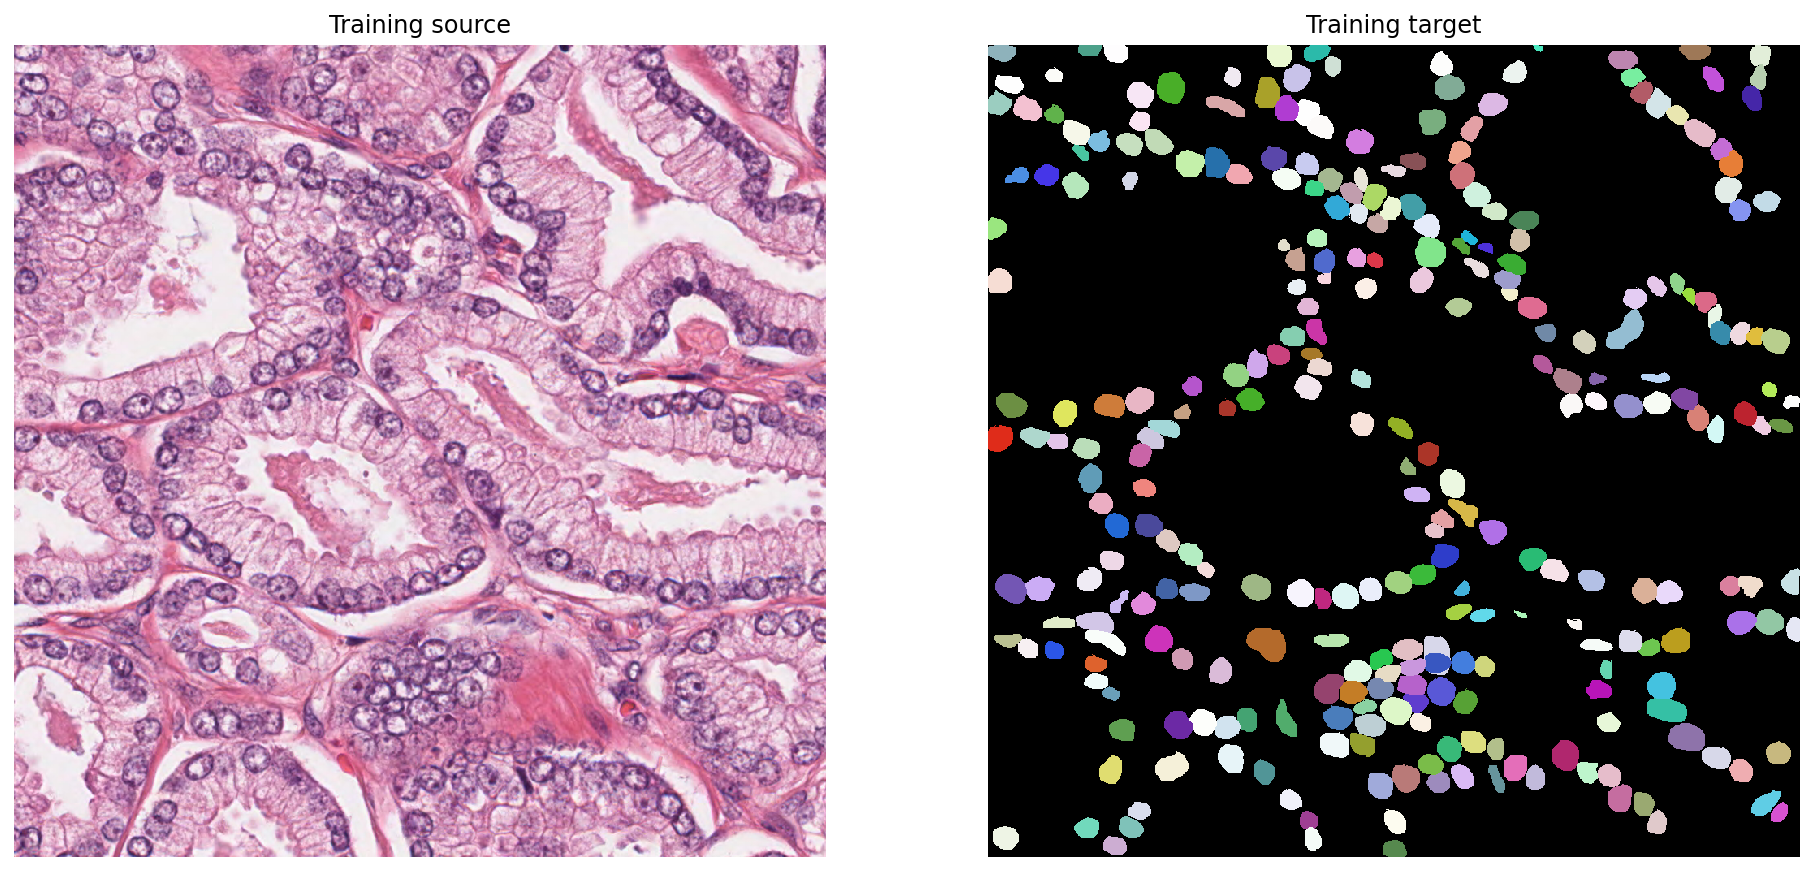

In [13]:
#@markdown ###Path to training images: 
Training_source = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4StarDist/MoNuSegTrainingData/Tissue Images" #@param {type:"string"}

Training_target = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4StarDist/MoNuSegTrainingData/Instance Masks" #@param {type:"string"}


#@markdown ###Name of the model and path to model folder:
model_name = "monuseg_stardist_17032022" #@param {type:"string"}

model_path = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ" #@param {type:"string"}
#trained_model = model_path 


#@markdown ### Other parameters for training:
number_of_epochs =  2#@param {type:"number"}

#@markdown ###Advanced Parameters
Use_Default_Advanced_Parameters = True #@param {type:"boolean"}

#@markdown ###If not, please input:

#GPU_limit = 90 #@param {type:"number"}
batch_size =  15#@param {type:"number"}
number_of_steps = 50#@param {type:"number"}
patch_size = 512 #@param {type:"number"}
percentage_validation =  10 #@param {type:"number"}
n_rays = 32 #@param {type:"number"}
grid_parameter = 2#@param [1, 2, 4, 8, 16, 32] {type:"raw"}
initial_learning_rate = 0.0001 #@param {type:"number"}

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 2
  n_rays = 32
  percentage_validation = 10
  grid_parameter = 2
  initial_learning_rate = 0.0003

percentage = percentage_validation/100

#here we check that no model with the same name already exist, if so print a warning

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3"+W)

  
# Here we open will randomly chosen input and output image
random_choice = random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)

# Here we check the image dimensions

Image_Y = x.shape[0]
Image_X = x.shape[1]

print('Loaded images (width, length) =', x.shape)

# If default parameters, patch size is the same as image size
if (Use_Default_Advanced_Parameters):
  patch_size = min(Image_Y, Image_X)
  
#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image 

if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print(bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

if patch_size > 2048:
  patch_size = 2048
  print(bcolors.WARNING + " Your image dimension is large; therefore the patch_size chosen is now:",patch_size)


# Here we check that the patch_size is divisible by 16
if not patch_size % 16 == 0:
    patch_size = ((int(patch_size / 16)-1) * 16)
    print(bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is:",patch_size)

# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = False


print("Parameters initiated.")


os.chdir(Training_target)
y = imread(Training_target+"/"+random_choice)

#Here we use a simple normalisation strategy to visualise the image
norm = simple_norm(x, percent = 99)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest', norm=norm, cmap='magma')
plt.title('Training source')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest', cmap=lbl_cmap)
plt.title('Training target')
plt.axis('off');
plt.savefig('/content/TrainingDataExample_StarDist2D.png',bbox_inches='tight',pad_inches=0)

## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here via random rotations, flips, and intensity changes.


<font size = 4> **However, data augmentation is not a magic solution and may also introduce issues. Therefore, we recommend that you train your network with and without augmentation, and use the QC section to validate that it improves overall performances.** 

In [5]:
#Data augmentation

Use_Data_augmentation = True #@param {type:"boolean"}

#@markdown ####Choose a factor by which you want to multiply your original dataset

Multiply_dataset_by = 4 #@param {type:"slider", min:1, max:10, step:1}


def random_fliprot(img, mask): 
    assert img.ndim >= mask.ndim
    axes = tuple(range(mask.ndim))
    perm = tuple(np.random.permutation(axes))
    img = img.transpose(perm + tuple(range(mask.ndim, img.ndim))) 
    mask = mask.transpose(perm) 
    for ax in axes: 
        if np.random.rand() > 0.5:
            img = np.flip(img, axis=ax)
            mask = np.flip(mask, axis=ax)
    return img, mask 

def random_intensity_change(img):
    img = img*np.random.uniform(0.6,2) + np.random.uniform(-0.2,0.2)
    return img


def augmenter(x, y):
    """Augmentation of a single input/label image pair.
    x is an input image
    y is the corresponding ground-truth label image
    """
    x, y = random_fliprot(x, y)
    x = random_intensity_change(x)
    # add some gaussian noise
    sig = 0.02*np.random.uniform(0,1)
    x = x + sig*np.random.normal(0,1,x.shape)
    return x, y



if Use_Data_augmentation:
  augmenter = augmenter
  print("Data augmentation enabled")


if not Use_Data_augmentation:
  augmenter = None
  print(bcolors.WARNING+"Data augmentation disabled") 




Data augmentation enabled



## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a StarDist model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [18]:
# @markdown ##Loading weights from a pre-trained network


Use_pretrained_model = True #@param {type:"boolean"}

pretrained_model_choice = "BioImage Model Zoo" #@param ["Model_from_file", "BioImage Model Zoo", "2D_versatile_fluo_from_Stardist_Fiji", "2D_Demo_Model_from_Stardist_Github", "Versatile_H&E_nuclei"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

#@markdown ###If you chose "BioImage Model Zoo", please provide the path or the URL to the model:
bioimageio_model = "10.5281/zenodo.6338614" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")
  # --------------------- Load the model from the choosen path ------------------------
  elif pretrained_model_choice == "BioImage Model Zoo":
    h5_file_path = "/content/bioimage_model_zoo/"
    %rm -rf $h5_file_path
    model_imported = import_bioimageio(bioimageio_model, h5_file_path)
    del model_imported
    biomodel = load_resource_description(bioimageio_model)    
    h5_file_path = os.path.join(h5_file_path, biomodel.config['stardist']['weights'])

# --------------------- Download the Demo 2D model provided in the Stardist 2D github ------------------------

  if pretrained_model_choice == "2D_Demo_Model_from_Stardist_Github":
    pretrained_model_name = "2D_Demo"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_Github")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/raw/master/models/examples/2D_demo/config.json", pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/raw/master/models/examples/2D_demo/thresholds.json", pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/blob/master/models/examples/2D_demo/weights_best.h5?raw=true", pretrained_model_path)    
    wget.download("https://github.com/mpicbg-csbd/stardist/blob/master/models/examples/2D_demo/weights_last.h5?raw=true", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Download the Demo 2D_versatile_fluo_from_Stardist_Fiji ------------------------

  if pretrained_model_choice == "2D_versatile_fluo_from_Stardist_Fiji":
    print("Downloading the 2D_versatile_fluo_from_Stardist_Fiji")
    pretrained_model_name = "2D_versatile_fluo"
    pretrained_model_path = "/content/"+pretrained_model_name
    
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    
    wget.download("https://cloud.mpi-cbg.de/index.php/s/1k5Zcy7PpFWRb0Q/download?path=/versatile&files=2D_versatile_fluo.zip", pretrained_model_path)
    
    with zipfile.ZipFile(pretrained_model_path+"/2D_versatile_fluo.zip", 'r') as zip_ref:
      zip_ref.extractall(pretrained_model_path)
    
    h5_file_path = os.path.join(pretrained_model_path, "weights_best.h5")

# --------------------- Download the Versatile (H&E nuclei)_fluo_from_Stardist_Fiji ------------------------

  if pretrained_model_choice == "Versatile_H&E_nuclei":
    print("Downloading the Versatile_H&E_nuclei from_Stardist_Fiji")
    pretrained_model_name = "2D_versatile_he"
    pretrained_model_path = "/content/"+pretrained_model_name
    
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    
    wget.download("https://cloud.mpi-cbg.de/index.php/s/1k5Zcy7PpFWRb0Q/download?path=/versatile&files=2D_versatile_he.zip", pretrained_model_path)
    
    with zipfile.ZipFile(pretrained_model_path+"/2D_versatile_he.zip", 'r') as zip_ref:
      zip_ref.extractall(pretrained_model_path)
    
    h5_file_path = os.path.join(pretrained_model_path, "weights_best.h5")


# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist' + W)
    Use_pretrained_model = False

  
# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained network will be used.')



Loading network weights from 'stardist_weights.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
Weights found in:
/content/bioimage_model_zoo/stardist_weights.h5
will be loaded prior to training.


#**4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

In [19]:
#@markdown ##Create the model and dataset objects

# --------------------- Here we delete the model folder if it already exist ------------------------

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(model_path+'/'+model_name)


# --------------------- Here we load the augmented data or the raw data ------------------------


Training_source_dir = Training_source
Training_target_dir = Training_target
# --------------------- ------------------------------------------------

training_images_tiff=Training_source_dir+"/*.tif"
mask_images_tiff=Training_target_dir+"/*.tif"

# this funtion imports training images and masks and sorts them suitable for the network
X = sorted(glob(training_images_tiff))   
Y = sorted(glob(mask_images_tiff))   

# assert -funtion check that X and Y really have images. If not this cell raises an error
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

# Here we map the training dataset (images and masks).
X = list(map(imread,X))
Y = list(map(imread,Y))
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]

# --------------------- Piece of code to remove alpha channel in RGBA images ------------------------

if n_channel == 4:
  X[:] = [i[:,:,:3] for i in X]
  print("The alpha channel has been removed")
  n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]


if not Use_Data_augmentation:
  augmenter = None
  

#Normalize images and fill small label holes.

if n_channel == 1:
  axis_norm = (0,1)   # normalize channels independently
  print("Normalizing image channels independently")


if n_channel > 1:
  axis_norm = (0,1,2) # normalize channels jointly
  print("Normalizing image channels jointly")  
  sys.stdout.flush()

X = [normalize(x,1,99.8,axis=axis_norm) for x in tqdm(X)]
Y = [fill_label_holes(y) for y in tqdm(Y)]

#Here we split the your training dataset into training images (90 %) and validation images (10 %). 
#It is advisable to use 10 % of your training dataset for validation. This ensures the truthfull validation error value. If only few validation images are used network may choose too easy or too challenging images for validation. 
# split training data (images and masks) into training images and validation images.
assert len(X) > 1, "not enough training data"
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = max(1, int(round(percentage * len(ind))))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X[i] for i in ind_val]  , [Y[i] for i in ind_val]
X_trn, Y_trn = [X[i] for i in ind_train], [Y[i] for i in ind_train] 
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_trn))
print('- validation:     %3d' % len(X_val))

# Use OpenCL-based computations for data generator during training (requires 'gputools')
# Currently always false for stability
use_gpu = False and gputools_available()

#Here we ensure that our network has a minimal number of steps

if (Use_Default_Advanced_Parameters) or (number_of_steps == 0): 
  # number_of_steps= (int(len(X)/batch_size)+1)
  number_of_steps = int(Image_X*Image_Y/(patch_size*patch_size))*(int(len(X)/batch_size)+1)
  if (Use_Data_augmentation):
    augmentation_factor = Multiply_dataset_by
    number_of_steps = number_of_steps * augmentation_factor


# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":            
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------



conf = Config2D (
    n_rays       = n_rays,
    use_gpu      = use_gpu,
    train_batch_size = batch_size,
    n_channel_in = n_channel,
    train_patch_size = (patch_size, patch_size),
    grid = (grid_parameter, grid_parameter),
    train_learning_rate = initial_learning_rate,
)

# Here we create a model according to section 5.3.
model = StarDist2D(conf, name=model_name, basedir=model_path)

# --------------------- Using pretrained model ------------------------
# Load the pretrained weights 
if Use_pretrained_model:
  model.load_weights(h5_file_path)

# --------------------- ---------------------- ------------------------

#Here we check the FOV of the network.
median_size = calculate_extents(list(Y), np.median)
fov = np.array(model._axes_tile_overlap('YX'))
if any(median_size > fov):
    print(bcolors.WARNING+"WARNING: median object size larger than field of view of the neural network.")
print(conf)

pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

print("Number of steps: "+str(number_of_steps))



!! WARNING: Model folder already exists and has been removed !!
Normalizing image channels jointly


100%|██████████| 30/30 [00:01<00:00, 18.08it/s]


number of images:  30
- training:        27
- validation:       3
Using default values: prob_thresh=0.5, nms_thresh=0.4.

Config2D(axes='YXC', backbone='unet', grid=(2, 2), n_channel_in=3, n_channel_out=33, n_classes=None, n_dim=2, n_rays=32, net_conv_after_unet=128, net_input_shape=(None, None, 3), net_mask_shape=(None, None, 1), train_background_reg=0.0001, train_batch_size=2, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_class_weights=(1, 1), train_completion_crop=32, train_dist_loss='mae', train_epochs=400, train_foreground_only=0.9, train_learning_rate=0.0003, train_loss_weights=(1, 0.2), train_n_val_patches=None, train_patch_size=(976, 976), train_reduce_lr={'factor': 0.5, 'patience': 40, 'min_delta': 0}, train_sample_cache=True, train_shape_completion=False, train_steps_per_epoch=100, train_tensorboard=True, unet_activation='relu', unet_batch_norm=False, unet_dropout=0.0, unet_kernel_size=(3, 3), unet_

## **4.2. Start Training**
---

<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

<font size = 4>**Of Note:** At the end of the training, your model will be automatically exported so it can be used in the Stardist Fiji plugin. You can find it in your model folder (TF_SavedModel.zip). In Fiji, Make sure to choose the right version of tensorflow. You can check at: Edit-- Options-- Tensorflow. Choose the version 1.4 (CPU or GPU depending on your system).

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

In [20]:
#@markdown ##Start training

start = time.time()


history = model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=augmenter,
                      epochs=number_of_epochs, steps_per_epoch=number_of_steps)
None;

print("Training done")

print("Network optimization in progress")
#Here we optimize the network.
model.optimize_thresholds(X_val, Y_val)

print("Done")

# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])



# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

model.export_TF()

print("Your model has been sucessfully exported and can now also be used in the Stardist Fiji plugin")

pdf_export(trained=True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

#Create a pdf document with training summary

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.




Epoch 1/2
16/16 [==============================] - 7s 461ms/step - loss: 0.6799 - prob_loss: 0.1797 - dist_loss: 2.5006 - prob_kld: 0.0508 - dist_relevant_mae: 2.4999 - dist_relevant_mse: 18.3906 - dist_dist_iou_metric: 0.6927 - val_loss: 0.6532 - val_prob_loss: 0.1818 - val_dist_loss: 2.4011 - val_prob_kld: 0.0434 - val_dist_relevant_mae: 2.4262 - val_dist_relevant_mse: 15.4103 - val_dist_dist_iou_metric: 0.7416

Epoch 2/2
16/16 [==============================] - 3s 194ms/step - loss: 0.6500 - prob_loss: 0.1786 - dist_loss: 2.3570 -

NMS threshold = 0.5:  75%|███████▌  | 15/20 [00:07<00:02,  2.09it/s, 0.649 -> 0.694]


Using optimized values: prob_thresh=0.651211, nms_thresh=0.3.
Saving to 'thresholds.json'.
Done
Time elapsed: 0.0 hour(s) 0.0 min(s) 44 sec(s)


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: /tmp/tmpv17u9l4o/model/saved_model.pb
Your model has been sucessfully exported and can now also be used in the Stardist Fiji plugin


# **5. Evaluate your model**
---

<font size = 4>This section allows you to perform important quality checks on the validity and generalisability of the trained model.  


<font size = 4>**We highly recommend to perform quality control on all newly trained models.**




In [22]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/BMZ/monuseg_stardist_17032022" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:  
  print(bcolors.WARNING+'!! WARNING: The chosen model does not exist !!')
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The monuseg_stardist_17032022 network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.




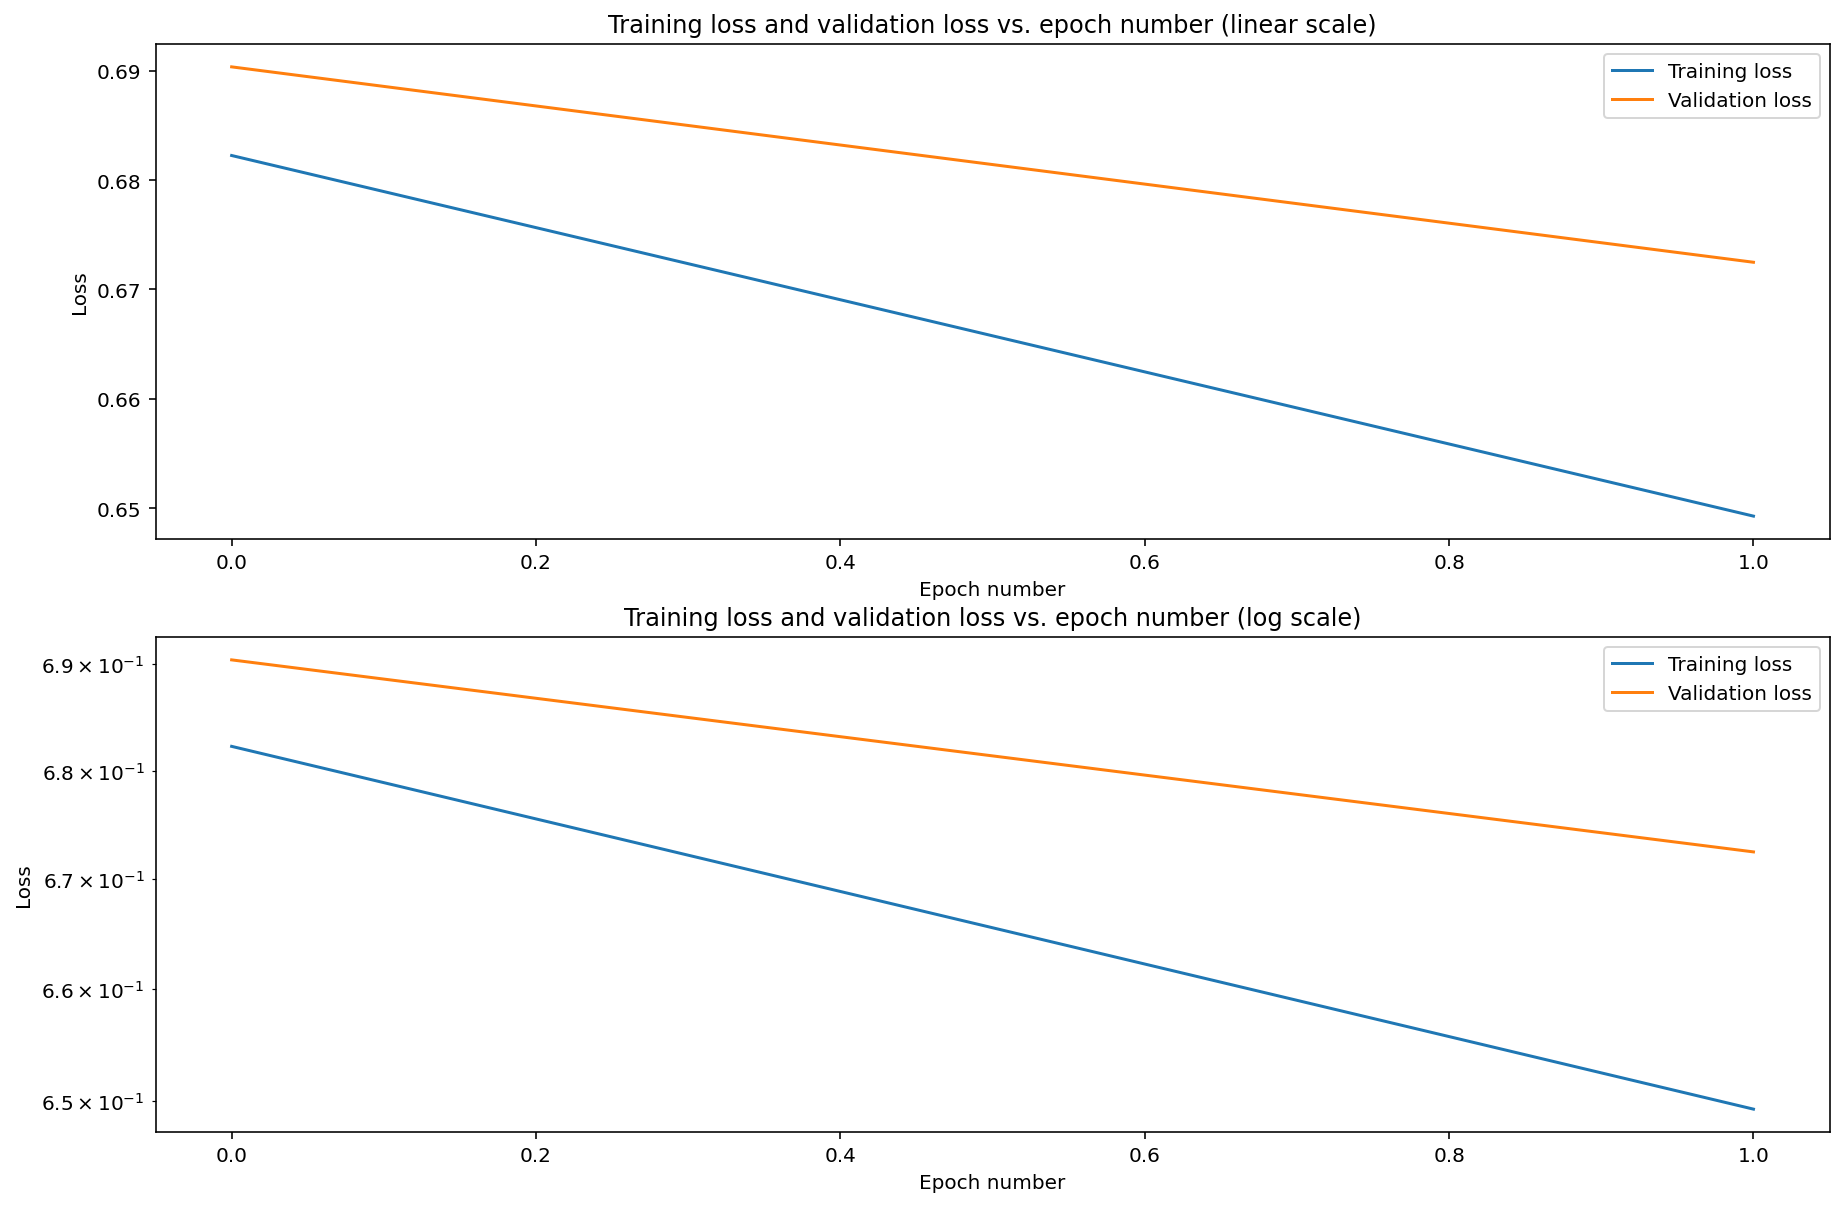

In [ ]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png',bbox_inches='tight',pad_inches=0)
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will calculate the Intersection over Union score for all the images provided in the Source_QC_folder and Target_QC_folder ! The result for one of the image will also be displayed.

<font size = 4>The **Intersection over Union** (IuO) metric is a method that can be used to quantify the percent overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict nuclei. 

<font size = 4>Here, the IuO is both calculated over the whole image and on a per-object basis. The value displayed below is the IuO value calculated over the entire image. The IuO value calculated on a per-object basis is used to calculate the other metrics displayed.

<font size = 4>“n_true” refers to the number of objects present in the ground truth image. “n_pred” refers to the number of objects present in the predicted image. 

<font size = 4>When a segmented object has an IuO value above 0.5 (compared to the corresponding ground truth), it is then considered a true positive. The number of “**true positives**” is available in the table below. The number of “false positive” is then defined as  “**false positive**” = “n_pred” - “true positive”. The number of “false negative” is defined as “false negative” = “n_true” - “true positive”.

<font size = 4>The mean_matched_score is the mean IoUs of matched true positives. The mean_true_score is the mean IoUs of matched true positives but normalized by the total number of ground truth objects. The panoptic_quality is calculated as described by [Kirillov et al. 2019](https://arxiv.org/abs/1801.00868).

<font size = 4>For more information about the other metric displayed, please consult the SI of the paper describing ZeroCostDL4Mic.

<font size = 4> The results can be found in the "*Quality Control*" folder which is located inside your "model_folder".

In [24]:
#@markdown ##Choose the folders that contain your Quality Control dataset

from stardist.matching import matching
from stardist.plot import render_label, render_label_pred 

Source_QC_folder = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4StarDist/MoNuSegTrainingData/Tissue Images" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/MyDrive/Projectos/DEEP-IMAGEJ/examples_of_models/ZeroCostDL4Mic/data4StarDist/MoNuSegTrainingData/Instance Masks" #@param{type:"string"}


#Create a quality control Folder and check if the folder already exist
if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control") == False:
  os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control")

if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")


# Generate predictions from the Source_QC_folder and save them in the QC folder

Source_QC_folder_tif = Source_QC_folder+"/*.tif"

np.random.seed(16)
lbl_cmap = random_label_cmap()
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))
n_channel = 1 if Z[0].ndim == 2 else Z[0].shape[-1]

print('Number of test dataset found in the folder: '+str(len(Z)))
  
#Normalize images.

if n_channel == 1:
  axis_norm = (0,1)   # normalize channels independently
  print("Normalizing image channels independently")

if n_channel > 1:
  axis_norm = (0,1,2) # normalize channels jointly
  print("Normalizing image channels jointly") 

model = StarDist2D(None, name=QC_model_name, basedir=QC_model_path)

names = [os.path.basename(f) for f in sorted(glob(Source_QC_folder_tif))]

 
# modify the names to suitable form: path_images/image_numberX.tif
  
lenght_of_Z = len(Z)
  
for i in range(lenght_of_Z):
  img = normalize(Z[i], 1,99.8, axis=axis_norm)
  labels, polygons = model.predict_instances(img)
  os.chdir(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")
  imsave(names[i], labels, polygons)

# Here we start testing the differences between GT and predicted masks

with open(QC_model_path+"/"+QC_model_name+"/Quality Control/Quality_Control for "+QC_model_name+".csv", "w", newline='') as file:
  writer = csv.writer(file, delimiter=",")
  writer.writerow(["image","Prediction v. GT Intersection over Union", "false positive", "true positive", "false negative", "precision", "recall", "accuracy", "f1 score", "n_true", "n_pred", "mean_true_score", "mean_matched_score", "panoptic_quality"])  

# define the images

  for n in os.listdir(Source_QC_folder):
    
    if not os.path.isdir(os.path.join(Source_QC_folder,n)):
      print('Running QC on: '+n)
      test_input = io.imread(os.path.join(Source_QC_folder,n))
      test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction",n))
      test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, n))

      # Calculate the matching (with IoU threshold `thresh`) and all metrics
      
      stats = matching(test_ground_truth_image, test_prediction, thresh=0.5)

      #Convert pixel values to 0 or 255
      test_prediction_0_to_255 = test_prediction
      test_prediction_0_to_255[test_prediction_0_to_255>0] = 255

      #Convert pixel values to 0 or 255
      test_ground_truth_0_to_255 = test_ground_truth_image
      test_ground_truth_0_to_255[test_ground_truth_0_to_255>0] = 255


      # Intersection over Union metric

      intersection = np.logical_and(test_ground_truth_0_to_255, test_prediction_0_to_255)
      union = np.logical_or(test_ground_truth_0_to_255, test_prediction_0_to_255)
      iou_score =  np.sum(intersection) / np.sum(union)
      writer.writerow([n, str(iou_score), str(stats.fp), str(stats.tp), str(stats.fn), str(stats.precision), str(stats.recall), str(stats.accuracy), str(stats.f1), str(stats.n_true), str(stats.n_pred), str(stats.mean_true_score), str(stats.mean_matched_score), str(stats.panoptic_quality)])

from tabulate import tabulate

df = pd.read_csv (QC_model_path+"/"+QC_model_name+"/Quality Control/Quality_Control for "+QC_model_name+".csv")
print(tabulate(df, headers='keys', tablefmt='psql'))


from astropy.visualization import simple_norm

# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file = os.listdir(Source_QC_folder)):
  

  plt.figure(figsize=(25,5))
  if n_channel > 1:
    source_image = io.imread(os.path.join(Source_QC_folder, file))
  if n_channel == 1:
    source_image = io.imread(os.path.join(Source_QC_folder, file), as_gray = True)

  target_image = io.imread(os.path.join(Target_QC_folder, file), as_gray = True)
  prediction = io.imread(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction/"+file, as_gray = True)

  stats = matching(prediction, target_image, thresh=0.5)

  target_image_mask = np.empty_like(target_image)
  target_image_mask[target_image > 0] = 255
  target_image_mask[target_image == 0] = 0
  
  prediction_mask = np.empty_like(prediction)
  prediction_mask[prediction > 0] = 255
  prediction_mask[prediction == 0] = 0

  intersection = np.logical_and(target_image_mask, prediction_mask)
  union = np.logical_or(target_image_mask, prediction_mask)
  iou_score =  np.sum(intersection) / np.sum(union)

  norm = simple_norm(source_image, percent = 99)

  #Input
  plt.subplot(1,4,1)
  plt.axis('off')
  if n_channel > 1:
    plt.imshow(source_image)
  if n_channel == 1:
    plt.imshow(source_image, aspect='equal', norm=norm, cmap='magma', interpolation='nearest')
  plt.title('Input')

  #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  plt.imshow(target_image_mask, aspect='equal', cmap='Greens')
  plt.title('Ground Truth')

  #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  plt.imshow(prediction_mask, aspect='equal', cmap='Purples')
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  plt.imshow(target_image_mask, cmap='Greens')
  plt.imshow(prediction_mask, alpha=0.5, cmap='Purples')
  plt.title('Ground Truth and Prediction, Intersection over Union:'+str(round(iou_score,3 )));
  plt.savefig(full_QC_model_path+'/Quality Control/QC_example_data.png',bbox_inches='tight',pad_inches=0)


qc_pdf_export()

Number of test dataset found in the folder: 30
Normalizing image channels jointly
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.651211, nms_thresh=0.3.
Running QC on: TCGA-G9-6356-01Z-00-DX1.tif
Running QC on: TCGA-G9-6363-01Z-00-DX1.tif
Running QC on: TCGA-A7-A13E-01Z-00-DX1.tif
Running QC on: TCGA-49-4488-01Z-00-DX1.tif
Running QC on: TCGA-HE-7129-01Z-00-DX1.tif
Running QC on: TCGA-A7-A13F-01Z-00-DX1.tif
Running QC on: TCGA-38-6178-01Z-00-DX1.tif
Running QC on: TCGA-AR-A1AS-01Z-00-DX1.tif
Running QC on: TCGA-G9-6348-01Z-00-DX1.tif
Running QC on: TCGA-50-5931-01Z-00-DX1.tif
Running QC on: TCGA-HE-7130-01Z-00-DX1.tif
Running QC on: TCGA-B0-5711-01Z-00-DX1.tif
Running QC on: TCGA-AR-A1AK-01Z-00-DX1.tif
Running QC on: TCGA-HE-7128-01Z-00-DX1.tif
Running QC on: TCGA-G9-6336-01Z-00-DX1.tif
Running QC on: TCGA-18-5592-01Z-00-DX1.tif
Running QC on: TCGA-KB-A93J-01A-01-TS1.tif
Running QC on: TCGA-RD-A8N9-01A-01-T

interactive(children=(Dropdown(description='file', options=('TCGA-G9-6356-01Z-00-DX1.tif', 'TCGA-G9-6363-01Z-0…

FileNotFoundError: ignored

## **5.3. Export your model into the BioImage Model Zoo format**
---
<font size = 4>This section exports the model into the BioImage Model Zoo format so it can be used directly with DeepImageJ. The new files will be stored in the model folder specified at the beginning of Section 5. 

<font size = 4>Once the cell is executed, you will find a new zip file with the name specified in `Trained_model_name.bioimage.io.model`.

<font size = 4>To use it with deepImageJ, download it and unzip it in the ImageJ/models/ or Fiji/models/ folder of your local machine. 

<font size = 4>In ImageJ, open the example image given within the downloaded zip file. Go to Plugins > DeepImageJ > DeepImageJ Run. Choose this model from the list and click OK.

<font size = 4>  More information at https://deepimagej.github.io/deepimagej/

In [ ]:
# ------------- User input ------------
os.chdir("/content/")

# information about the model
#@markdown ##Introduce the metadata of the model architecture:
Trained_model_name    = "" #@param {type:"string"}
Trained_model_authors =  "[Author 1, Author 2, Author 3]" #@param {type:"string"}
Trained_model_authors_affiliation =  "[Affiliation 1, Affiliation 2, Affiliation 3]" #@param {type:"string"}
Trained_model_description = "" #@param {type:"string"}
Trained_model_license = 'MIT'#@param {type:"string"}
Trained_model_references = [ "Uwe Schmidt et al. MICCAI 2018", "Martin Weigert et al. WACV 2020", "Lucas von Chamier et al. biorXiv 2020"] 
Trained_model_DOI = ["https://doi.org/10.1007/978-3-030-00934-2_30", "https://doi.org/10.1109/WACV45572.2020.9093435", "https://doi.org/10.1101/2020.03.20.000133"] 

#@markdown ##Introduce the pixel size (in microns) of the image provided as an example of the model processing:
# information about the example image
PixelSize = 1 #@param {type:"number"}
#@markdown ##Do you want to choose the exampleimage?
default_example_image = True #@param {type:"boolean"}
#@markdown ###If not, please input:
fileID    =  "" #@param {type:"string"}


# Load an example image
if default_example_image:
    i=0 # first image of the target list
    test_img = Z[i]
else:
    test_img = imread(fileID)

# Load the model
model = StarDist2D(None, name=QC_model_name, basedir=QC_model_path)
modelfile = Path(os.path.join(QC_model_path, QC_model_name + 'bioimageio.zip'))
export_bioimageio(model, modelfile, test_img)

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.



## **6.1 Generate prediction(s) from unseen dataset**
---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

---

<font size = 4>The current trained model (from section 4.3) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Prediction_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you will train.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output ROI.

<font size = 4>**`Data_type`:** Please indicate if the images you want to predict are single images or stacks


<font size = 4>In stardist the following results can be exported:
- Region of interest (ROI) that can be opened in ImageJ / Fiji. The ROI are saved inside of a .zip file in your choosen result folder. To open the ROI in Fiji, just drag and drop the zip file !**
- The predicted mask images
- A tracking file that can easily be imported into Trackmate to track the nuclei.
- A CSV file that contains the number of nuclei detected per image. 
- A CSV file that contains the coordinate the centre of each detected nuclei (single image only). 



In [ ]:
Single_Images = 1
Stacks = 2

#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.

Data_folder = "" #@param {type:"string"}
Results_folder = "" #@param {type:"string"}

#@markdown ###Are your data single images or stacks?

Data_type = Single_Images #@param ["Single_Images", "Stacks"] {type:"raw"}

#@markdown ###What outputs would you like to generate?
Region_of_interests = True #@param {type:"boolean"}
Mask_images = True #@param {type:"boolean"}
Tracking_file = False #@param {type:"boolean"}


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  print(bcolors.WARNING+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')

#single images

if Data_type == 1 :

  Data_folder = Data_folder+"/*.tif"

  print("Single images are now beeing predicted")
  np.random.seed(16)
  lbl_cmap = random_label_cmap()
  X = sorted(glob(Data_folder))
  X = list(map(imread,X))
  n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
  
  # axis_norm = (0,1,2) # normalize channels jointly
  if n_channel == 1:
    axis_norm = (0,1)   # normalize channels independently
    print("Normalizing image channels independently")

  if n_channel > 1:
    axis_norm = (0,1,2) # normalize channels jointly
    print("Normalizing image channels jointly")  
    sys.stdout.flush()  
  
  model = StarDist2D(None, name = Prediction_model_name, basedir = Prediction_model_path)
 
  names = [os.path.basename(f) for f in sorted(glob(Data_folder))]  
  Nuclei_number = []

  # modify the names to suitable form: path_images/image_numberX.tif
  FILEnames = []
  for m in names:
    m = Results_folder+'/'+m
    FILEnames.append(m)

  # Create a list of name with no extension
 
  name_no_extension=[]
  for n in names:
    name_no_extension.append(os.path.splitext(n)[0])
    
  # Save all ROIs and masks into results folder
  
  for i in range(len(X)):
    img = normalize(X[i], 1,99.8, axis = axis_norm)
    labels, polygons = model.predict_instances(img)
    
    os.chdir(Results_folder)

    if Mask_images:
      imsave(FILEnames[i], labels, polygons)

    if Region_of_interests:
      export_imagej_rois(name_no_extension[i], polygons['coord'])

    if Tracking_file:
      Tracking_image = np.zeros((img.shape[1], img.shape[0]))
      for point in polygons['points']:
        cv2.circle(Tracking_image,tuple(point),0,(1), -1)
      
      Tracking_image_32 = img_as_float32(Tracking_image, force_copy=False)
      Tracking_image_8 = img_as_ubyte(Tracking_image, force_copy=True)      
      Tracking_image_8_rot = np.rot90(Tracking_image_8, axes=(0, 1))
      Tracking_image_8_rot_flip = np.flipud(Tracking_image_8_rot)
      imsave(Results_folder+"/"+str(name_no_extension[i])+"_tracking_file.tif", Tracking_image_8_rot_flip, compress=ZIP_DEFLATED)
    
    Nuclei_centre_coordinate = polygons['points']
    my_df2 = pd.DataFrame(Nuclei_centre_coordinate)
    my_df2.columns =['Y', 'X']
    
    my_df2.to_csv(Results_folder+'/'+name_no_extension[i]+'_Nuclei_centre.csv', index=False, header=True)

    Nuclei_array = polygons['coord']
    Nuclei_array2 = [names[i], Nuclei_array.shape[0]]
    Nuclei_number.append(Nuclei_array2) 

  my_df = pd.DataFrame(Nuclei_number)
  my_df2.columns =['Frame number', 'Number of objects']
  my_df.to_csv(Results_folder+'/Nuclei_count.csv', index=False, header=False)
  
# One example is displayed

  print("One example image is displayed bellow:")
  plt.figure(figsize=(10,10))
  plt.imshow(img if img.ndim==2 else img[...,:3], clim=(0,1), cmap='gray')
  plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
  plt.axis('off');
  plt.savefig(name_no_extension[i]+"_overlay.tif")

# Here is the code to analyse stacks

if Data_type == 2 :
  print("Stacks are now beeing predicted")
  np.random.seed(42)
  lbl_cmap = random_label_cmap()

  # normalize channels independently
  axis_norm = (0,1)  
  
  model = StarDist2D(None, name = Prediction_model_name, basedir = Prediction_model_path)
  
  for image in os.listdir(Data_folder):
    print("Performing prediction on: "+image)

    Number_of_nuclei_list = []
    Number_of_frame_list = []

    timelapse = imread(Data_folder+"/"+image)

    short_name = os.path.splitext(image)     
    
    timelapse = normalize(timelapse, 1,99.8, axis=(0,)+tuple(1+np.array(axis_norm)))
    

    if Region_of_interests: 
      polygons = [model.predict_instances(frame)[1]['coord'] for frame in tqdm(timelapse)]    
      export_imagej_rois(Results_folder+"/"+str(short_name[0]), polygons, compression=ZIP_DEFLATED)  
    
    n_timepoint = timelapse.shape[0]
    prediction_stack = np.zeros((n_timepoint, timelapse.shape[1], timelapse.shape[2]))
    Tracking_stack = np.zeros((n_timepoint, timelapse.shape[2], timelapse.shape[1]))

# Analyse each time points one after the other
    if Mask_images or Tracking_file:
      for t in range(n_timepoint):
        img_t = timelapse[t]
        labels, polygons = model.predict_instances(img_t)      
        prediction_stack[t] = labels
        Nuclei_array = polygons['coord']
        Nuclei_array2 = [str(t), Nuclei_array.shape[0]]
        Number_of_nuclei_list.append(Nuclei_array2)
        Number_of_frame_list.append(t)

# Create a tracking file for trackmate

        for point in polygons['points']:
          cv2.circle(Tracking_stack[t],tuple(point),0,(1), -1)

      prediction_stack_32 = img_as_float32(prediction_stack, force_copy=False)
      Tracking_stack_32 = img_as_float32(Tracking_stack, force_copy=False)
      Tracking_stack_8 = img_as_ubyte(Tracking_stack_32, force_copy=True)
      
      Tracking_stack_8_rot = np.rot90(Tracking_stack_8, axes=(1,2))
      Tracking_stack_8_rot_flip = np.fliplr(Tracking_stack_8_rot)

# Export a csv file containing the number of nuclei detected at each frame
      my_df = pd.DataFrame(Number_of_nuclei_list)
      my_df.to_csv(Results_folder+'/'+str(short_name[0])+'_Nuclei_number.csv', index=False, header=False)

      os.chdir(Results_folder)
      if Mask_images:
        imsave(str(short_name[0])+".tif", prediction_stack_32, compress=ZIP_DEFLATED)
      if Tracking_file:
        imsave(str(short_name[0])+"_tracking_file.tif", Tracking_stack_8_rot_flip, compress=ZIP_DEFLATED)

  # Object detected vs frame number
    plt.figure(figsize=(20,5))
    my_df.plot()
    plt.title('Number of objects vs frame number')
    plt.ylabel('Number of detected objects')
    plt.xlabel('Frame number')
    plt.legend()
    plt.savefig(Results_folder+'/'+str(short_name[0])+'_Object_detected_vs_frame_number.png',bbox_inches='tight',pad_inches=0)
    plt.show()         

print("Predictions completed")   

## **6.2. Generate prediction(s) from unseen dataset (Big data)**
---

<font size = 4>You can use this section of the notebook to generate predictions on very large images. Compatible file formats include .Tif and .svs files.

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you trained.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output ROI.


<font size = 4>In stardist the following results can be exported:
- Region of interest (ROI) that can be opened in ImageJ / Fiji. The ROI are saved inside of a .zip file in your choosen result folder. To open the ROI in Fiji, just drag and drop the zip file ! IMPORTANT: ROI files cannot be exported for extremely large images.
- The predicted mask images








In [ ]:
#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.


start = time.time()


Data_folder = "" #@param {type:"string"}

Results_folder = "" #@param {type:"string"}

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}


#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)


#@markdown #####To analyse very large image, your images need to be divided into blocks.  Each blocks will then be processed independently and re-assembled to generate the final image. 
#@markdown #####Here you can choose the dimension of the block.

block_size_Y =   1024#@param {type:"number"}
block_size_X =   1024#@param {type:"number"}


#@markdown #####Here you can the amount of overlap between each block.
min_overlap =   50#@param {type:"number"}

#@markdown #####To analyse large blocks, your blocks need to be divided into tiles.  Each tile will then be processed independently and re-assembled to generate the final block. 

n_tiles_Y =  1#@param {type:"number"}
n_tiles_X =  1#@param {type:"number"}


#@markdown ###What outputs would you like to generate? 
Mask_images = True #@param {type:"boolean"}

Region_of_interests = True #@param {type:"boolean"}

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'

if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


#Create a temp folder to save Zarr files

Temp_folder = "/content/Temp_folder"

if os.path.exists(Temp_folder):
  shutil.rmtree(Temp_folder)
os.makedirs(Temp_folder)


# mi, ma = np.percentile(img[::8], [1,99.8])                      # compute percentiles from low-resolution image
# mi, ma = np.percentile(img[13000:16000,13000:16000], [1,99.8])  # compute percentiles from smaller crop
mi, ma = 0, 255                                                   # use min and max dtype values (suitable here)
normalizer = MyNormalizer(mi, ma)


np.random.seed(16)
lbl_cmap = random_label_cmap()

#Load the StarDist model

model = StarDist2D(None, name=Prediction_model_name, basedir=Prediction_model_path)


for image in os.listdir(Data_folder):
  print("Performing prediction on: "+image)

  X = imread(Data_folder+"/"+image)

  print("Image dimension "+str(X.shape))

  short_name = os.path.splitext(image)

  n_channel = 1 if X.ndim == 2 else X.shape[-1]
  
  # axis_norm = (0,1,2) # normalize channels jointly
  if n_channel == 1:
    axis_norm = (0,1)   # normalize channels independently
    print("Normalizing image channels independently")
    block_size = (block_size_Y, block_size_X)
    min_overlap = (min_overlap, min_overlap)
    n_tiles = (n_tiles_Y, n_tiles_X)
    axes="YX"

  if n_channel > 1:
    axis_norm = (0,1,2) # normalize channels jointly
    print("Normalizing image channels jointly")
    axes="YXC"
    block_size = (block_size_Y, block_size_X, 3)
    n_tiles = (n_tiles_Y, n_tiles_X, 1)
    min_overlap = (min_overlap, min_overlap, 0)  
    sys.stdout.flush()
  
  zarr.save_array(str(Temp_folder+"/image.zarr"), X)
  del X
  img = zarr.open(str(Temp_folder+"/image.zarr"), mode='r')
  
  labels = zarr.open(str(Temp_folder+"/labels.zarr"), mode='w', shape=img.shape[:3], chunks=img.chunks[:3], dtype=np.int32)
    
  
  labels, polygons = model.predict_instances_big(img, axes=axes, block_size=block_size, min_overlap=min_overlap, context=None,
                                            normalizer=normalizer, show_progress=True, n_tiles=n_tiles)
  
# Save the predicted mask in the result folder
  os.chdir(Results_folder)
  if Mask_images:
    imsave(str(short_name[0])+".tif", labels, compress=ZIP_DEFLATED)
  if Region_of_interests:  
    export_imagej_rois(str(short_name[0])+'labels_roi.zip', polygons['coord'], compression=ZIP_DEFLATED)

  del img


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

# One example image 

fig, (a,b) = plt.subplots(1,2, figsize=(20,20))
a.imshow(labels[::8,::8], cmap='tab20b')
b.imshow(labels[::8,::8], cmap=lbl_cmap)
a.axis('off'); b.axis('off');
None;

## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.14**:  


*   This version now includes an automatic restart allowing to set the h5py library to v2.10.
*  The section 1 and 2 are now swapped for better export of *requirements.txt*.

*   This version also now includes built-in version check and the version log that you're reading now.

* Consume and export BioImage Model Zoo formats directly with StarDist






#**Thank you for using StarDist 2D!**